In [2]:
%matplotlib inline
import pandas as pd 
pd.set_option('display.max_rows', None)

dfS = pd.read_excel('2016Senate.xlsx')
df_vote = dfS[["GENERAL %" , "CANDIDATE NAME" , "STATE"]]
df_real_vote = df_vote[(df_vote["GENERAL %"]) > .1]
df_2016_Senate = df_real_vote.reset_index(inplace = False)

In [1]:
from pytrends.request import TrendReq
import numpy as np
pytrend = TrendReq()

gtrends2016S = []
names = [["Richard Shelby","Ron Crumpton"],["Lisa Murkowski","Joe Miller"],["John McCain","Ann Kirkpatrick"],["John Boozman","Conner Eldridge"],["Kamala Harris","Loretta Sanchez"],["Michael Bennet","Darryl Glenn"],["Richard Blumenthal","Dan Carter"],["Marco Rubio","Patrick Murphy"],["Johnny Isakson","Jim Barksdale"],["Brian Schatz","John Carroll"],["Mike Crapo","Jerry Sturgill"],["Tammy Duckworth","Mark Kirk"],["Todd Young","Evan Bayh"],["Chuck Grassley","Patty Judge"],["Jerry Moran","Patrick Wiesner"],["Rand Paul","Jim Gray"],["John Kennedy","Foster Campbell"],["Chris Van Hollen","Kathy Szeliga"],["Roy Blunt","Jason Kander"],["Catherine Cortez Masto","Joe Heck"],["Maggie Hassan","Kelly Ayotte"],["Chuck Schumer","Wendy Long"],["Richard Burr","Deborah Ross"],["John Hoeven","Eliot Glassheim"],["Rob Portman","Ted Strickland"],["James Lankford","Mike Workman"],["Ron Wyden","Mark Callahan"],["Pat Toomey","Katie McGinty"],["Tim Scott","Thomas Dixon"], ["John Thune" , "Jay Wiliams"], ["Mike Lee","Misty Snow"],["Patrick Leahy","Scott Milne"],["Patty Murray","Chris Vance"],["Ron Johnson","Russ Feingold"]]

def searchState(kw_list):
    pytrend.build_payload(kw_list, geo = 'US',  timeframe = '2016-01-01 2016-11-08')
    iot_2016 = pytrend.interest_over_time()
    person1 = (sum(iot_2016[kw_list[0]]))/ ((sum(iot_2016[kw_list[0]])) + (sum(iot_2016[kw_list[1]])))
    person2 = 1-person1
    x = (person1, person2)
    gtrends2016S.append(x)


kw_list = [searchState(n) for n in names]

In [7]:
from pprint import pprint
gtrends16S = ([item for c_list in gtrends2016S for item in c_list])

gtrends16S = pd.DataFrame(np.array(gtrends16S))
df_gtrends_2016S = gtrends16S.rename(columns={0 : 'Percent Searched'})

In [8]:
df_2016S = df_2016_Senate[["CANDIDATE NAME" , "GENERAL %"]]

df_combined4 = df_2016S.join(df_gtrends_2016S, how = "left")

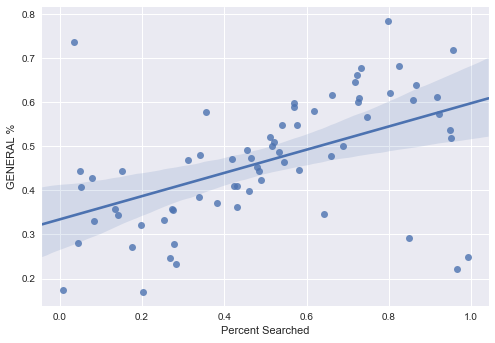

In [11]:
import seaborn as sns 

sns.regplot(x = "Percent Searched" , y = "GENERAL %" , data = df_combined4)

In [12]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import statsmodels.regression.mixed_linear_model as sm_mlm

ols = smf.ols(formula = "GP ~ PS", data = df_combined4.rename(columns = {"GENERAL %" : "GP", "Percent Searched" : "PS"}))
model = ols.fit()
model.summary()

C:\Users\catjm\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GP   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     23.39
Date:                Fri, 29 Dec 2017   Prob (F-statistic):           8.27e-06
Time:                        15:13:40   Log-Likelihood:                 46.988
No. Observations:                  68   AIC:                            -89.98
Df Residuals:                      66   BIC:                            -85.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3341      0.031     10.753      0.000       0.272       0.396
PS             0.2636      0.055      4.836      0.000       0.155       0.372
==============================================================================
Omnibus:                        8.215   Durbin-Watson:                   2.993
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               12.630
Skew:                          -0.363   Prob(JB):                      0.00181
Kurtosis:                       4.983   Cond. No.                         4.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""